In [6]:
import numpy as np
import pandas as pd
import datetime
import os
import sqlite3
import MetaTrader5 as mt5
import talib as ta



In [7]:
url = 'https://site1.sbisec.co.jp/ETGate/?OutSide=on&_ControlID=WPLETmgR001Control&_PageID=WPLETmgR001Mdtl20&_DataStoreID=DSWPLETmgR001Control&_ActionID=DefaultAID&getFlg=on&burl=search_market&cat1=market&cat2=none&dir=info&file=market_meigara_225.html'
# テーブルリストを取得
table_list = pd.read_html(url)
# 2番目が該当するテーブルなのでデータフレーム化
df_nk225_sbi = table_list[1]
# 最初の2カラムのみ残す
df_nk225_sbi = df_nk225_sbi.iloc[:, [0, 1]]
# カラム名を指定
df_nk225_sbi.columns = ['code', 'name']
df_nk225_sbi


,code,name
0,1332,日本水産
1,1333,マルハニチロ
2,1605,INPEX
3,1721,コムシスホールディングス
4,1801,大成建設
...,...,...
220,9613,エヌ・ティ・ティ・データ
221,9735,セコム
222,9766,コナミホールディングス
223,9983,ファーストリテイリング


In [8]:
code_result = [str(row['code']) for i,row in df_nk225_sbi.iterrows()]
print(code_result)
code_ids_string = ','.join(code_result)


['1332', '1333', '1605', '1721', '1801', '1802', '1803', '1808', '1812', '1925', '1928', '1963', '2002', '2269', '2282', '2413', '2432', '2501', '2502', '2503', '2531', '2768', '2801', '2802', '2871', '2914', '3086', '3099', '3101', '3103', '3289', '3382', '3401', '3402', '3405', '3407', '3436', '3659', '3861', '3863', '4004', '4005', '4021', '4042', '4043', '4061', '4063', '4151', '4183', '4188', '4208', '4324', '4452', '4502', '4503', '4506', '4507', '4519', '4523', '4543', '4568', '4578', '4631', '4689', '4704', '4751', '4755', '4901', '4902', '4911', '5019', '5020', '5101', '5108', '5201', '5202', '5214', '5232', '5233', '5301', '5332', '5333', '5401', '5406', '5411', '5541', '5631', '5703', '5706', '5707', '5711', '5713', '5714', '5801', '5802', '5803', '6098', '6103', '6113', '6178', '6301', '6302', '6305', '6326', '6361', '6367', '6471', '6472', '6473', '6479', '6501', '6503', '6504', '6506', '6645', '6674', '6701', '6702', '6703', '6724', '6752', '6753', '6758', '6762', '6770',

In [9]:
db_file_name = './sqllite/jpstocks.db'
conn = sqlite3.connect(db_file_name)
sql = 'SELECT * from raw_prices where code = {} order by date'
df_list = []

with conn:
	for i,row in df_nk225_sbi.iterrows():
		#rows = conn.executemany(sql, str(row['code']))
		df=pd.read_sql_query(sql.format(row['code']), conn)
		df['SMA10'] = ta.SMA(df['close'], timeperiod=10)
		df_list.append(df)

n225_df = pd.concat(df_list)
print(n225_df)




      code        date    open    high     low   close    volume   SMA10
0     1332  1983-01-04   266.0   266.0   263.0   266.0    214000     NaN
1     1332  1983-01-05   266.0   269.0   264.0   267.0    921000     NaN
2     1332  1983-01-06   270.0   274.0   267.0   270.0   2481000     NaN
3     1332  1983-01-07   271.0   272.0   267.0   270.0   1240000     NaN
4     1332  1983-01-08   270.0   270.0   266.0   268.0    508000     NaN
...    ...         ...     ...     ...     ...     ...       ...     ...
5987  9984  2022-06-20  4867.0  4975.0  4826.0  4933.0  18416500  5214.4
5988  9984  2022-06-21  5025.0  5126.0  4978.0  5075.0  14623600  5178.9
5989  9984  2022-06-22  5097.0  5123.0  5025.0  5025.0  14855300  5125.1
5990  9984  2022-06-23  5049.0  5145.0  5030.0  5103.0  14280200  5069.5
5991  9984  2022-06-24  5145.0  5249.0  5107.0  5224.0  14084400  5037.4

[1905368 rows x 8 columns]


In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
 
# MetaTrader 5に接続する
if not mt5.initialize():
   print("initialize() failed")
   mt5.shutdown()
 
# 接続状態とパラメータをリクエストする
print(mt5.terminal_info())
# MetaTrader 5バージョンについてのデータを取得する
print(mt5.version())
 
# 数々の方法で異なる銘柄からバーを取得する
ratesm = mt5.copy_rates_from("JP225", mt5.TIMEFRAME_H1, datetime(2022,5,4,21), 300000)
rates_framem = pd.DataFrame(ratesm)
# 秒での時間をdatetime形式に変換する
rates_framem['time']=pd.to_datetime(rates_framem['time'], unit='s')
print(rates_framem)

# MetaTrader 5への接続をシャットダウンする
mt5.shutdown()


TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=True, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=3320, maxbars=100000000, codepage=932, ping_last=25684, community_balance=0.0, retransmission=0.0, company='OANDA Corporation', name='OANDA MetaTrader 5', language='Japanese', path='C:\\Program Files\\OANDA MetaTrader 5', data_path='C:\\Users\\cheap\\AppData\\Roaming\\MetaQuotes\\Terminal\\EE0304F13905552AE0B5EAEFB04866EB', commondata_path='C:\\Users\\cheap\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 3320, '03 Jun 2022')
                     time     open     high      low    close  tick_volume  \
0     2016-06-07 00:00:00  16659.2  16838.0  16528.1  16727.8        12756   
1     2016-06-08 00:00:00  16722.8  16852.7  16572.8  16797.6        12489   
2     2016-06-09 00:00:00  16760.1  16796.2  16496.5  16631.3        13012   
3     2016-06-10 

True

In [11]:
df = rates_framem.set_index('time')
df.index = df.index.tz_localize('Asia/Famagusta')
df.index = df.index.tz_convert('Asia/Tokyo')
df = df.at_time('15:00')
df


,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2020-03-30 15:00:00+09:00,19217.2,19238.4,18867.7,18964.5,2612,0,0
2020-03-31 15:00:00+09:00,19077.5,19077.5,18806.8,19061.8,2141,0,0
2020-04-01 15:00:00+09:00,18220.9,18220.9,17897.0,18043.6,3155,0,0
2020-04-02 15:00:00+09:00,17950.5,18086.0,17898.6,18036.0,1123,0,0
2020-04-03 15:00:00+09:00,17939.6,17942.2,17798.1,17889.6,1294,0,0
...,...,...,...,...,...,...,...
2022-04-28 15:00:00+09:00,26830.6,26940.6,26800.6,26937.6,729,50,0
2022-04-29 15:00:00+09:00,27380.6,27462.6,27342.6,27352.6,461,50,0
2022-05-02 15:00:00+09:00,26795.6,26887.6,26785.6,26862.6,562,50,0


In [12]:
backtest_start_date = '2016-05-26'
# backtest_start_date = '2022-01-01'
df['proportion'] = None
for date in pd.unique(n225_df['date']):
	if date > backtest_start_date:
		date_jpy = '{} 15:00:00+09:00'.format(date)
		date_df = n225_df[n225_df['date'] == date].copy()
		
		dt_tz = datetime.strptime(date_jpy, '%Y-%m-%d %H:%M:%S%z')
		df.loc[df.index==dt_tz, ['proportion']]=len(date_df[date_df['close']>=date_df['SMA10']])/len(date_df)

df
df_copy = df.copy()

In [13]:
df = df_copy.copy()
buy_exit_rate = 0.25
sell_exit_rate = 0.75
def calc_exit_price(close_price=None, proportion=None, exit_rate=None):
    y = close_price.copy()
    y[:] = np.nan
    for i in range(close_price.size):
        for j in range(i + 1, close_price.size):
            if proportion[j] <= exit_rate:
                y[i] = close_price[j]
                break
    return y

def cancel_kasane(y_buy,y_sell):
    ret_y_buy = y_buy.copy()
    ret_y_sell = y_sell.copy()
    pos = 0
    for i in range(ret_y_buy.size):
        if y_buy[i] != 0:
            if pos == 1:
                ret_y_buy[i] = 0
            else:
                ret_y_buy[i] = y_buy[i]
            pos = 1
        if y_sell[i] != 0:
            if pos == -1:
                ret_y_sell[i] = 0
            else:
                ret_y_sell[i] = y_sell[i]
            pos = -1
    return ret_y_buy, ret_y_sell

df = df.dropna()

df['buy_executed'] = (df['proportion']>=sell_exit_rate).astype('float64')
df['sell_executed'] = (df['proportion']<=buy_exit_rate).astype('float64')
#df['pos'] = df['buy_executed'] + -df['sell_executed']
df.loc[df['buy_executed']==1,['pos']] = 1
df.loc[df['sell_executed']==1,['pos']] = -1
df['pos'] = df['pos'].fillna(method='ffill')

df['buy_exit_price'] = calc_exit_price(df['close'].astype(np.float32),df['proportion'].astype(np.float32),buy_exit_rate)
df['y_buy'] = np.where(
    df['buy_executed'],
    df['buy_exit_price']-df['close'],
    0
)

df['sell_exit_price'] = calc_exit_price(df['close'].astype(np.float32),-df['proportion'].astype(np.float32),-1*sell_exit_rate)
df['y_sell'] = np.where(
    df['sell_executed'],
    df['close']-df['sell_exit_price'],
    0
)
df['y_buy'],df['y_sell'] = cancel_kasane(df['y_buy'],df['y_sell'])
df


,open,high,low,close,tick_volume,spread,real_volume,proportion,buy_executed,sell_executed,pos,buy_exit_price,y_buy,sell_exit_price,y_sell
time,,,,,,,,,,,,,,,
2020-03-30 15:00:00+09:00,19217.2,19238.4,18867.7,18964.5,2612,0,0,0.96,1.0,0.0,1.0,18036.000000,-928.5,19061.800781,0.000000
2020-03-31 15:00:00+09:00,19077.5,19077.5,18806.8,19061.8,2141,0,0,0.791111,1.0,0.0,1.0,18036.000000,0.0,19679.099609,0.000000
2020-04-01 15:00:00+09:00,18220.9,18220.9,17897.0,18043.6,3155,0,0,0.351111,0.0,0.0,1.0,18036.000000,0.0,19679.099609,0.000000
2020-04-02 15:00:00+09:00,17950.5,18086.0,17898.6,18036.0,1123,0,0,0.137778,0.0,1.0,-1.0,17889.599609,0.0,19679.099609,-1643.099609
2020-04-03 15:00:00+09:00,17939.6,17942.2,17798.1,17889.6,1294,0,0,0.12,0.0,1.0,-1.0,19123.599609,0.0,19679.099609,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25 15:00:00+09:00,26575.6,26617.6,26470.6,26477.6,847,50,0,0.258929,0.0,0.0,1.0,26392.599609,0.0,NaN,0.000000
2022-04-26 15:00:00+09:00,26700.6,26722.6,26605.6,26647.6,689,50,0,0.316964,0.0,0.0,1.0,26392.599609,0.0,NaN,0.000000
2022-04-27 15:00:00+09:00,26370.6,26425.6,26312.6,26392.6,755,50,0,0.174107,0.0,1.0,-1.0,NaN,0.0,NaN,NaN


累積リターン


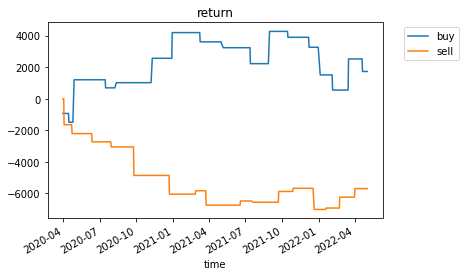

In [14]:
print('累積リターン')
df['y_buy'].cumsum().plot(label='buy')
df['y_sell'].cumsum().plot(label='sell')
plt.title('return')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()